# Quick cleaning and trying a couple of models on data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
# create a dataframe with all kaggle/pitchfork dataset data
path_to_data = "C:/Users/Dinara/Desktop/Springboard/Projects/pitchfork reviews/all_kaggle_data_e2.csv"
df1 = pd.read_csv(path_to_data, encoding = 'utf-8', parse_dates = ['pub_date'], index_col = 'reviewid')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26018 entries, 22703 to 3723
Data columns (total 20 columns):
content           26004 non-null object
reviewid:1        26018 non-null int64
genre             23317 non-null object
reviewid:2        26018 non-null int64
label             25965 non-null object
reviewid:3        26018 non-null int64
title             26014 non-null object
artist            26016 non-null object
url               26018 non-null object
score             26018 non-null float64
best_new_music    26018 non-null int64
author            26018 non-null object
author_type       20340 non-null object
pub_date          26018 non-null datetime64[ns]
pub_weekday       26018 non-null int64
pub_day           26018 non-null int64
pub_month         26018 non-null int64
pub_year          26018 non-null int64
reviewid:4        26018 non-null int64
year              25426 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(9), object(8)
memory usage: 4.2+ MB


In [11]:
import pandas_profiling

C:\Users\Dinara\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [12]:
pandas_profiling.ProfileReport(df1)

Number of variables,21
Number of observations,26018
Total Missing (%),1.7%
Total size in memory,4.2 MiB
Average record size in memory,168.0 B
Numeric,6
Categorical,8
Boolean,1
Date,1
Text (Unique),0
Rejected,5


### As seen above, pandas_profiling says that we have 186 duplicate rows. Let's eliminate duplicates, keeping one copy of each unique row. 

In [13]:
df1_dedup = df1.drop_duplicates()
df1_dedup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25832 entries, 22703 to 3723
Data columns (total 20 columns):
content           25818 non-null object
reviewid:1        25832 non-null int64
genre             23224 non-null object
reviewid:2        25832 non-null int64
label             25779 non-null object
reviewid:3        25832 non-null int64
title             25828 non-null object
artist            25830 non-null object
url               25832 non-null object
score             25832 non-null float64
best_new_music    25832 non-null int64
author            25832 non-null object
author_type       20247 non-null object
pub_date          25832 non-null datetime64[ns]
pub_weekday       25832 non-null int64
pub_day           25832 non-null int64
pub_month         25832 non-null int64
pub_year          25832 non-null int64
reviewid:4        25832 non-null int64
year              25240 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(9), object(8)
memory usage: 4.1+ MB


In [14]:
26018 - 25832

186

In [15]:
pandas_profiling.ProfileReport(df1_dedup)

Number of variables,21
Number of observations,25832
Total Missing (%),1.6%
Total size in memory,4.1 MiB
Average record size in memory,168.0 B
Numeric,6
Categorical,8
Boolean,1
Date,1
Text (Unique),0
Rejected,5


### Remove all rows whose 'content' value is null

In [18]:
df1_dedup_rev = df1_dedup[df1_dedup['content'].notnull()]
df1_dedup_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25818 entries, 22703 to 3723
Data columns (total 20 columns):
content           25818 non-null object
reviewid:1        25818 non-null int64
genre             23211 non-null object
reviewid:2        25818 non-null int64
label             25765 non-null object
reviewid:3        25818 non-null int64
title             25814 non-null object
artist            25816 non-null object
url               25818 non-null object
score             25818 non-null float64
best_new_music    25818 non-null int64
author            25818 non-null object
author_type       20236 non-null object
pub_date          25818 non-null datetime64[ns]
pub_weekday       25818 non-null int64
pub_day           25818 non-null int64
pub_month         25818 non-null int64
pub_year          25818 non-null int64
reviewid:4        25818 non-null int64
year              25226 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(9), object(8)
memory usage: 4.1+ MB


In [19]:
df1_dedup_rev.head(5)

,content,reviewid:1,genre,reviewid:2,label,reviewid:3,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid:4,year
reviewid,,,,,,,,,,,,,,,,,,,,
22703,"“Trip-hop” eventually became a ’90s punchline,...",22703,electronic,22703,virgin,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,1998.0
22721,"Eight years, five albums, and two EPs in, the ...",22721,metal,22721,hathenter,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,2016.0
22659,Minneapolis’ Uranium Club seem to revel in bei...,22659,rock,22659,fashionable idiots,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,2016.0
22659,Minneapolis’ Uranium Club seem to revel in bei...,22659,rock,22659,static shock,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,2016.0
22661,Kleenex began with a crash. It transpired one ...,22661,rock,22661,kill rock stars,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,2016.0


In [20]:
df1_dedup_rev.index.value_counts()

2626     20
19835    12
14955     9
11354     9
11733     8
22393     8
21701     8
11385     8
11552     8
21966     8
9787      8
3890      8
10924     8
22014     8
6813      8
5765      8
19984     8
14381     6
10767     6
19429     6
16130     6
15562     6
22341     6
4962      6
10204     6
11361     6
13451     6
15610     6
16108     6
301       6
         ..
5467      1
9565      1
11676     1
15710     1
3480      1
21907     1
17809     1
19856     1
15758     1
9613      1
11660     1
5515      1
7562      1
1417      1
21891     1
17793     1
19840     1
15742     1
9597      1
11644     1
5499      1
7546      1
15726     1
5483      1
1385      1
21859     1
17761     1
19808     1
13663     1
2049      1
Name: reviewid, dtype: int64

### I inspected the initial database to find out that there are sometimes multiple rows per reviewid in the following tables: years (record release year, _not_ review year), genres, labels and artists. I.e. sometimes there are multiple record release years, genres etc. per reviewid. We shall ignore that for now, and will take only the first item for each of those columns. *For future*: combine those values into lists (sets?), say if genre is rap & alternative rock, their genre column would be [rap, alternative rock]

### Let's remove duplicative reviewid columns while we are at it! 

In [25]:
df1_clean0 = df1_dedup_rev.drop_duplicates(subset = 'content')

In [27]:
df1_clean0.drop(['reviewid:1', 'reviewid:2', 'reviewid:3', 'reviewid:4'], axis =1, inplace = True)

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
df1_clean0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18378 entries, 22703 to 3723
Data columns (total 16 columns):
content           18378 non-null object
genre             16015 non-null object
label             18331 non-null object
title             18376 non-null object
artist            18376 non-null object
url               18378 non-null object
score             18378 non-null float64
best_new_music    18378 non-null int64
author            18378 non-null object
author_type       14477 non-null object
pub_date          18378 non-null datetime64[ns]
pub_weekday       18378 non-null int64
pub_day           18378 non-null int64
pub_month         18378 non-null int64
pub_year          18378 non-null int64
year              17972 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 2.4+ MB


### Let's try removing duplicates, but preserving last instead of first

In [29]:
df1_dedup_rev.drop(['reviewid:1', 'reviewid:2', 'reviewid:3', 'reviewid:4'], axis =1, inplace = True)

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
df1_clean1 = df1_dedup_rev.drop_duplicates(subset = 'content', keep = 'last')

In [31]:
df1_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18378 entries, 22703 to 3723
Data columns (total 16 columns):
content           18378 non-null object
genre             16015 non-null object
label             18331 non-null object
title             18376 non-null object
artist            18376 non-null object
url               18378 non-null object
score             18378 non-null float64
best_new_music    18378 non-null int64
author            18378 non-null object
author_type       14477 non-null object
pub_date          18378 non-null datetime64[ns]
pub_weekday       18378 non-null int64
pub_day           18378 non-null int64
pub_month         18378 non-null int64
pub_year          18378 non-null int64
year              17972 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 2.4+ MB


### What if we removed all duplicates, how much fewer nulls would we get?

In [33]:
df1_clean2 = df1_dedup_rev.drop_duplicates(subset = 'content', keep = False)
df1_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12695 entries, 22703 to 3723
Data columns (total 16 columns):
content           12695 non-null object
genre             10546 non-null object
label             12653 non-null object
title             12694 non-null object
artist            12693 non-null object
url               12695 non-null object
score             12695 non-null float64
best_new_music    12695 non-null int64
author            12695 non-null object
author_type       10075 non-null object
pub_date          12695 non-null datetime64[ns]
pub_weekday       12695 non-null int64
pub_day           12695 non-null int64
pub_month         12695 non-null int64
pub_year          12695 non-null int64
year              12433 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 1.6+ MB


### Let's stick with our 'keep first of the content duplicates' dataframe for now (df1_clean0)

In [34]:
pandas_profiling.ProfileReport(df1_clean0)

Number of variables,17
Number of observations,18378
Total Missing (%),2.2%
Total size in memory,2.4 MiB
Average record size in memory,136.0 B
Numeric,6
Categorical,6
Boolean,1
Date,1
Text (Unique),2
Rejected,1


### Let's visualize pairwise dependencies in the data

In [35]:
import seaborn as sns

C:\Users\Dinara\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [38]:
df1_clean0.sort_index(inplace = True)

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

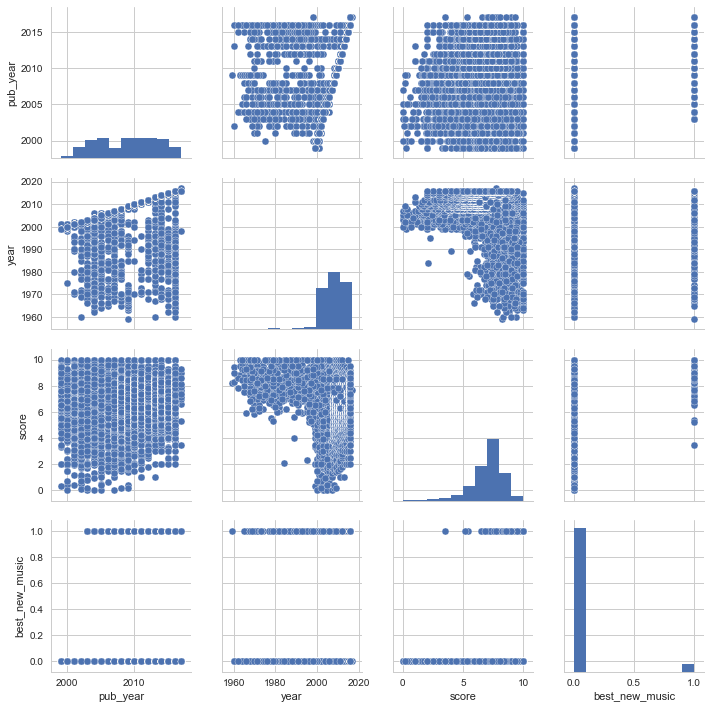

In [49]:
sns.pairplot(data=df1_clean0[['pub_year', 'year', 'score', 'best_new_music']].dropna(),dropna=True)

In [50]:
df1_clean0.score.median()

7.2

### Creating new column 'content_words' that simply stores the number of words in each review text.

In [52]:
import re

In [54]:
df1_clean0['content_words'] = df1_clean0.content.apply(lambda x: len(re.findall(r'\w+', x)))

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
df1_clean0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18378 entries, 1 to 22745
Data columns (total 17 columns):
content           18378 non-null object
genre             16015 non-null object
label             18331 non-null object
title             18376 non-null object
artist            18376 non-null object
url               18378 non-null object
score             18378 non-null float64
best_new_music    18378 non-null int64
author            18378 non-null object
author_type       14477 non-null object
pub_date          18378 non-null datetime64[ns]
pub_weekday       18378 non-null int64
pub_day           18378 non-null int64
pub_month         18378 non-null int64
pub_year          18378 non-null int64
year              17972 non-null float64
content_words     18378 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(8)
memory usage: 2.5+ MB


In [56]:
df1_clean0.tail(2)

,content,genre,label,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,content_words
reviewid,,,,,,,,,,,,,,,,,
22725,It is impossible to consider a given release b...,electronic,teklife,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,2016.0,550
22745,"On 2006’s “That’s Life,” Killer Mike boasted “...",rap,self-released,run the jewels 3,run the jewels,http://pitchfork.com/reviews/albums/22745-run-...,8.6,1,sheldon pearce,associate staff writer,2017-01-03,1,3,1,2017,2016.0,855


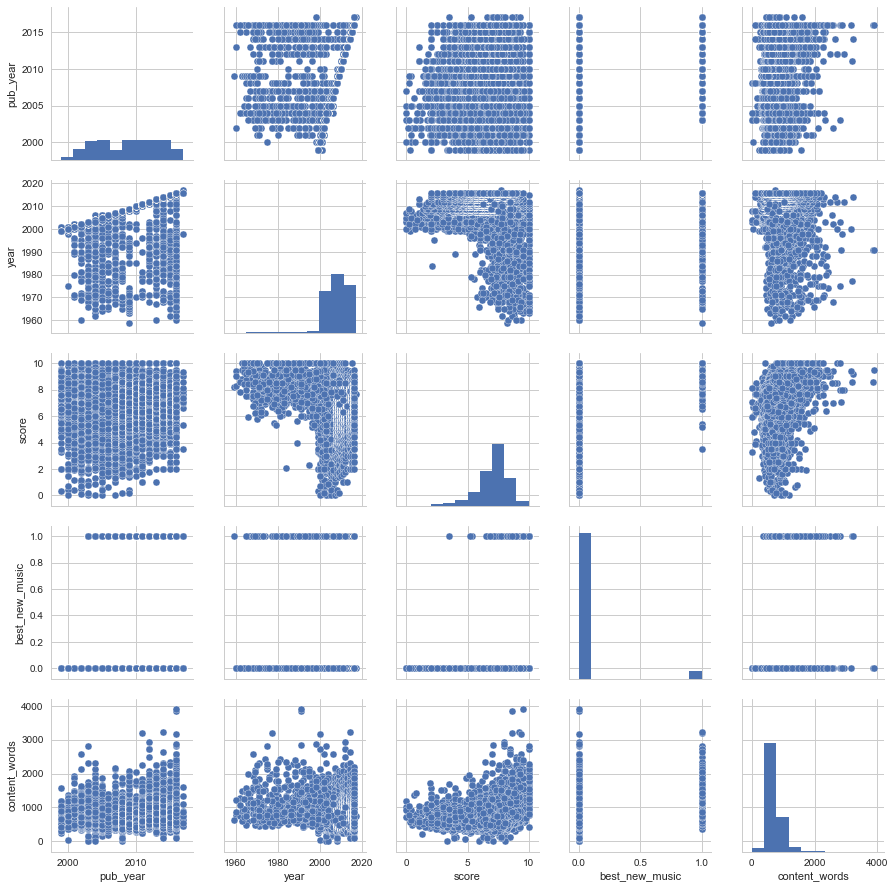

In [57]:
sns.pairplot(data=df1_clean0[['pub_year', 'year', 'score', 'best_new_music', 'content_words']].dropna(),dropna=True)

In [58]:
pandas_profiling.ProfileReport(df1_clean0)

Number of variables,18
Number of observations,18378
Total Missing (%),2.0%
Total size in memory,2.5 MiB
Average record size in memory,144.0 B
Numeric,7
Categorical,6
Boolean,1
Date,1
Text (Unique),2
Rejected,1


### Linear Regression First Try

In [59]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
data = df1_clean0.ix[:,'content_words']
target = df1_clean0.ix[:,'score']
x_train = data[:-10000]
x_test = data[-10000:]

In [81]:
y_train = target[:-10000]
y_test = target[-10000:]

In [82]:
regr = linear_model.LinearRegression()

In [83]:
regr.fit(x_train.to_frame(), y_train.to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
y_pred = regr.predict(x_test.to_frame())

In [85]:
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [[ 0.00119843]]


In [86]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 1.22


In [87]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.07


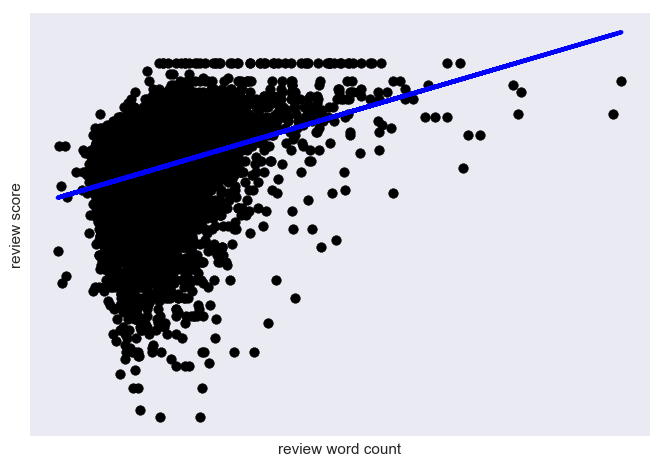

In [90]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel('review word count')
plt.ylabel('review score')
plt.axis('on')
plt.show()

In [91]:
df1_clean0.corr()

,score,best_new_music,pub_weekday,pub_day,pub_month,pub_year,year,content_words
score,1.000000,0.300480,0.002489,-0.006865,0.019843,0.045040,-0.116269,0.219572
best_new_music,0.300480,1.000000,-0.012466,-0.000543,0.011693,0.101705,-0.036404,0.307321
pub_weekday,0.002489,-0.012466,1.000000,0.003742,0.006930,-0.020010,-0.059583,0.042828
pub_day,-0.006865,-0.000543,0.003742,1.000000,-0.088365,-0.030218,-0.005135,0.001537
pub_month,0.019843,0.011693,0.006930,-0.088365,1.000000,-0.031695,-0.004487,0.060518
pub_year,0.045040,0.101705,-0.020010,-0.030218,-0.031695,1.000000,0.626397,0.128237
year,-0.116269,-0.036404,-0.059583,-0.005135,-0.004487,0.626397,1.000000,-0.137294
content_words,0.219572,0.307321,0.042828,0.001537,0.060518,0.128237,-0.137294,1.000000


### _Linear regression is not great: variance score is very low_

### Let's do a quick sentiment analysis 

In [97]:
# ran the following lines in PowerShell
# $ pip install -U textblob
# $ python -m textblob.download_corpora

In [99]:
import sys
!{sys.executable} -m pip install textblob

  Using cached textblob-0.15.1-py2.py3-none-any.whl


In [113]:
from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer
opinion = TextBlob("the dog is fluffy")
opinion.sentiment

Sentiment(polarity=-0.2, subjectivity=0.4)

In [114]:
type(TextBlob(df1_clean0.content.iloc[0]).sentiment.polarity)

float

In [116]:
df1_clean0['sentiment'] = df1_clean0['content'].apply(lambda x: TextBlob(x).sentiment)

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [118]:
df1_clean0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18378 entries, 1 to 22745
Data columns (total 18 columns):
content           18378 non-null object
genre             16015 non-null object
label             18331 non-null object
title             18376 non-null object
artist            18376 non-null object
url               18378 non-null object
score             18378 non-null float64
best_new_music    18378 non-null int64
author            18378 non-null object
author_type       14477 non-null object
pub_date          18378 non-null datetime64[ns]
pub_weekday       18378 non-null int64
pub_day           18378 non-null int64
pub_month         18378 non-null int64
pub_year          18378 non-null int64
year              17972 non-null float64
content_words     18378 non-null int64
sentiment         18378 non-null object
dtypes: datetime64[ns](1), float64(2), int64(6), object(9)
memory usage: 2.7+ MB


In [120]:
df1_clean0['subjectivity'] = df1_clean0['sentiment'].map(lambda x: x.subjectivity)

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [122]:
df1_clean0['polarity'] = df1_clean0['sentiment'].map(lambda x: x.polarity)

C:\Users\Dinara\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [123]:
df1_clean0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18378 entries, 1 to 22745
Data columns (total 20 columns):
content           18378 non-null object
genre             16015 non-null object
label             18331 non-null object
title             18376 non-null object
artist            18376 non-null object
url               18378 non-null object
score             18378 non-null float64
best_new_music    18378 non-null int64
author            18378 non-null object
author_type       14477 non-null object
pub_date          18378 non-null datetime64[ns]
pub_weekday       18378 non-null int64
pub_day           18378 non-null int64
pub_month         18378 non-null int64
pub_year          18378 non-null int64
year              17972 non-null float64
content_words     18378 non-null int64
sentiment         18378 non-null object
subjectivity      18378 non-null float64
polarity          18378 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(9)
memory usage: 2.9+ MB


In [125]:
data = df1_clean0.ix[:,('content_words', 'polarity')]
target = df1_clean0.ix[:,'score']

In [141]:
x1, y1 = scale(data), target
x1_train = x1[:-10000]
x1_test = x1[-10000:]

In [142]:
y1_train = y1[:-10000]
y1_test = y1[-10000:]

In [133]:
regr_sent = linear_model.LinearRegression(normalize = True)

In [143]:
regr_sent.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [144]:
y1_pred = regr_sent.predict(x1_test)

In [145]:
print('Coefficients: \n', regr_sent.coef_)

Coefficients: 
 [ 0.28575687  0.29717943]


In [146]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y1_test, y1_pred))

Mean squared error: 1.22


In [147]:
print('Variance score: %.2f' % r2_score(y1_test, y1_pred))

Variance score: 0.07


In [152]:
print(regr_sent.score(x1, y1))

0.0748498097686


### That didn't work that well either. Let's ruminate on the correlations for now then...

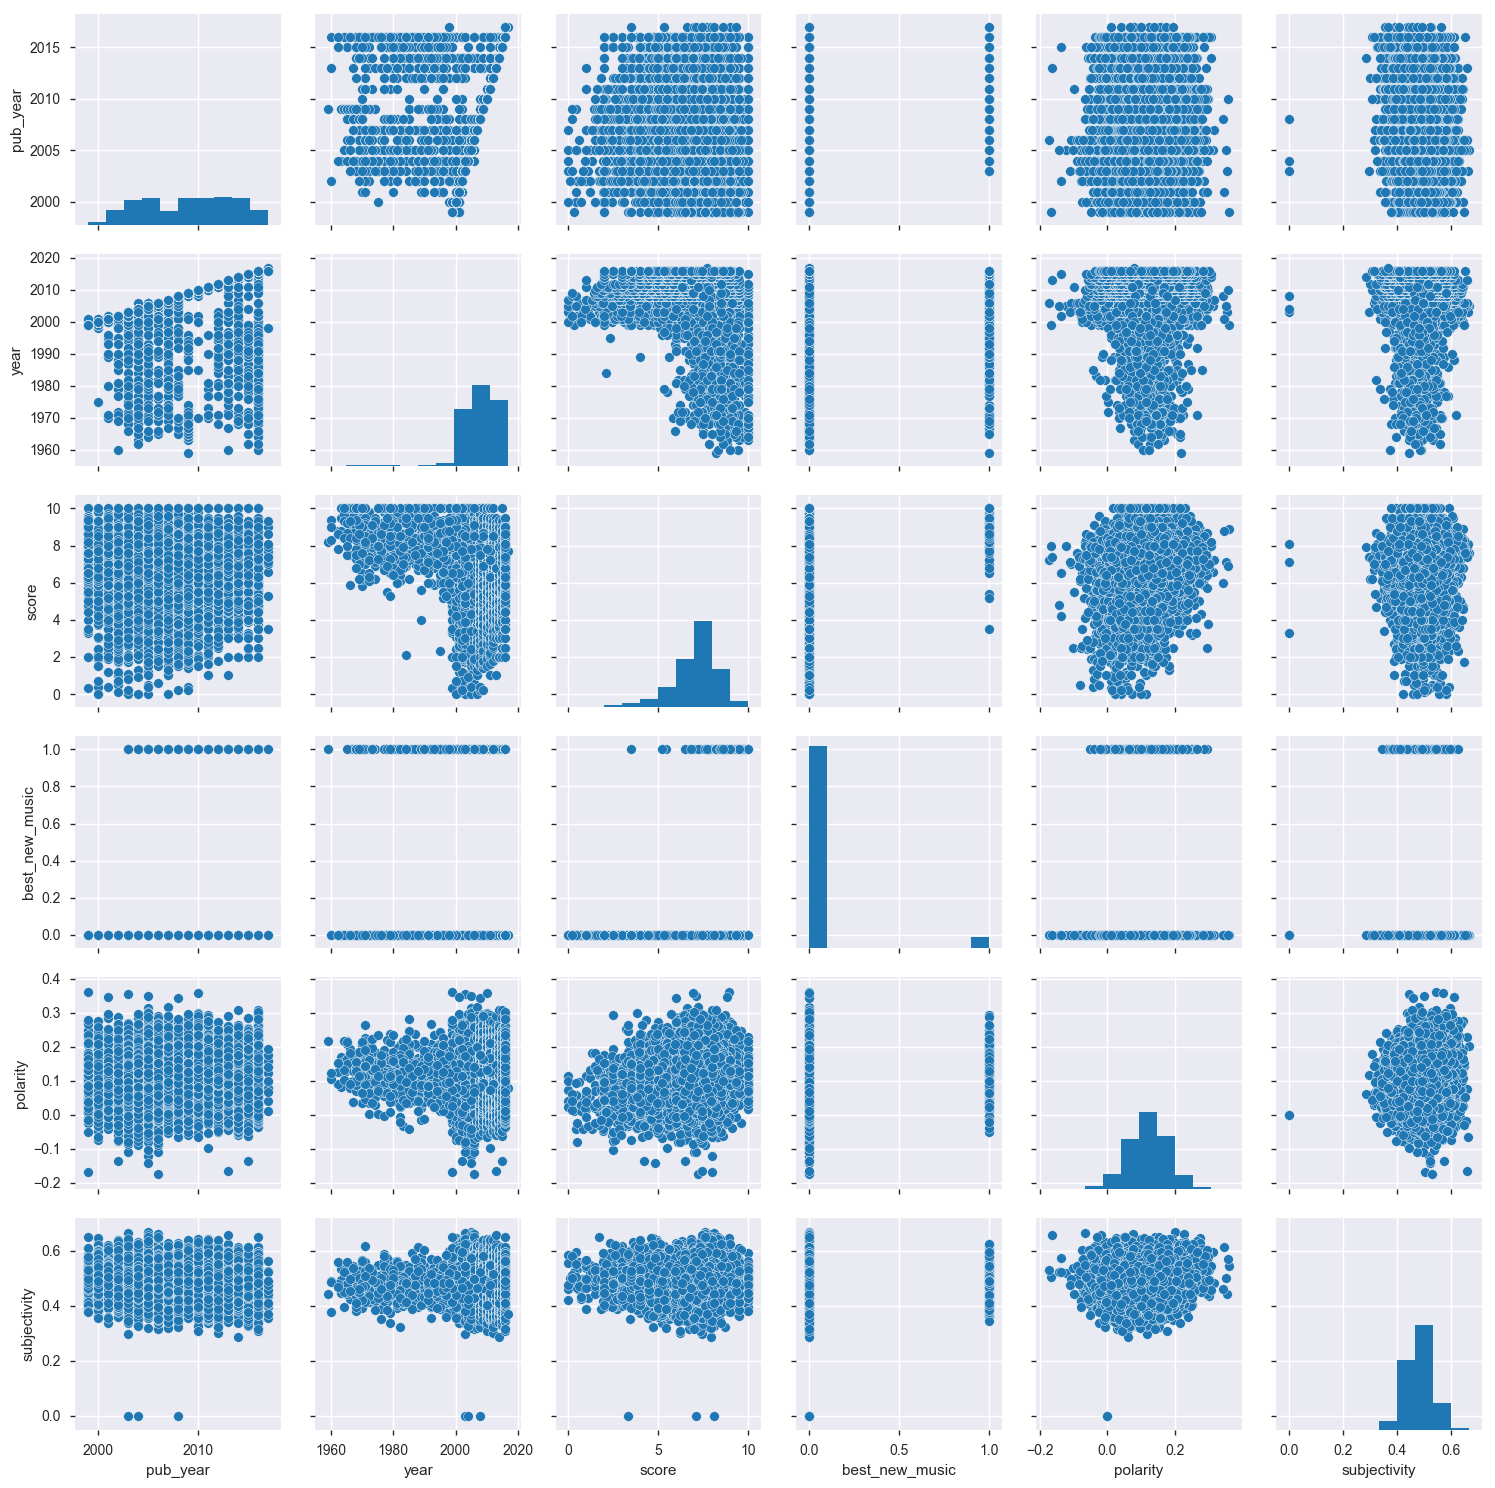

In [153]:
sns.pairplot(data=df1_clean0[['pub_year', 'year', 'score', 'best_new_music', 'polarity', 'subjectivity']].dropna(),dropna=True)

In [154]:
df1_clean0.corr()

,score,best_new_music,pub_weekday,pub_day,pub_month,pub_year,year,content_words,subjectivity,polarity
score,1.000000,0.300480,0.002489,-0.006865,0.019843,0.045040,-0.116269,0.219572,-0.026237,0.173678
best_new_music,0.300480,1.000000,-0.012466,-0.000543,0.011693,0.101705,-0.036404,0.307321,0.006237,0.034810
pub_weekday,0.002489,-0.012466,1.000000,0.003742,0.006930,-0.020010,-0.059583,0.042828,-0.001627,-0.015243
pub_day,-0.006865,-0.000543,0.003742,1.000000,-0.088365,-0.030218,-0.005135,0.001537,0.008503,-0.008609
pub_month,0.019843,0.011693,0.006930,-0.088365,1.000000,-0.031695,-0.004487,0.060518,-0.011641,-0.014160
pub_year,0.045040,0.101705,-0.020010,-0.030218,-0.031695,1.000000,0.626397,0.128237,-0.154524,0.075143
year,-0.116269,-0.036404,-0.059583,-0.005135,-0.004487,0.626397,1.000000,-0.137294,-0.078373,0.034676
content_words,0.219572,0.307321,0.042828,0.001537,0.060518,0.128237,-0.137294,1.000000,-0.018215,-0.002141
subjectivity,-0.026237,0.006237,-0.001627,0.008503,-0.011641,-0.154524,-0.078373,-0.018215,1.000000,0.110529
polarity,0.173678,0.034810,-0.015243,-0.008609,-0.014160,0.075143,0.034676,-0.002141,0.110529,1.000000
